In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append("../Pietone")
from neural_network import CustomLayerNN

### Load mnist image data
28 * 28 pixels for each image. Training and testing data contains 60k and 70k images respectively. 

In [3]:
cols = [str(i) for i in range(28*28)]
all_cols = ["label"] + cols

train = pd.read_csv("data\\mnist_train.csv.zip", names=all_cols)
test = pd.read_csv("data\\mnist_test.csv.zip", names=all_cols)
train.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Normalize

In [4]:
def one_hot_encode(labels):
    encoder = OneHotEncoder(sparse_output=False)
    return encoder.fit_transform(labels)
    
def show_image(X, y, loc, result=None):
    image = X[loc]
    pixels = image.reshape((28, 28))
    print("Label:", np.argmax(y[loc]), f"Result: {result}" if result is not None else "")
    plt.imshow(pixels, cmap='gray')
    plt.show()

#### Convert the label to a categorical [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
In addition, scale the bits

Label: 0 


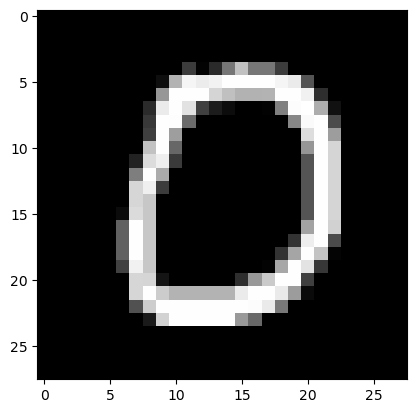

In [5]:
X_train = train.iloc[:, 1:].values / 255.0
y_train = train.iloc[:, 0].values.reshape(-1, 1)
y_train = one_hot_encode(y_train)

X_test = test.iloc[:, 1:].values / 255.0
y_test = test.iloc[:, 0].values.reshape(-1, 1)
y_test = one_hot_encode(y_test)

show_image(X_test, y_test, 10)

### Train model

In [6]:
nn = CustomLayerNN(input_size=28*28, layer_sizes=[512, 256, 128, 32], output_size=10, learning_rate=.01)

nn.train(X_train, y_train, epochs=1000)

Epoch 0, Loss: 0.2591
Epoch 100, Loss: 0.0644
Epoch 200, Loss: 0.0536
Epoch 300, Loss: 0.0468
Epoch 400, Loss: 0.0419
Epoch 500, Loss: 0.0380
Epoch 600, Loss: 0.0348
Epoch 700, Loss: 0.0322
Epoch 800, Loss: 0.0301
Epoch 900, Loss: 0.0283
Epoch 999, Loss: 0.0269


### Measure accuracy

In [7]:
y_pred_train = nn.predict(X_train)
y_pred_test = nn.predict(X_test)

train_accuracy = np.mean(np.argmax(y_pred_train, axis=1) == np.argmax(y_train, axis=1))
test_accuracy = np.mean(np.argmax(y_pred_test, axis=1) == np.argmax(y_test, axis=1))
train_accuracy, test_accuracy

(0.9050166666666667, 0.9078)

#### Find some errors

Label: 5 Result: 4


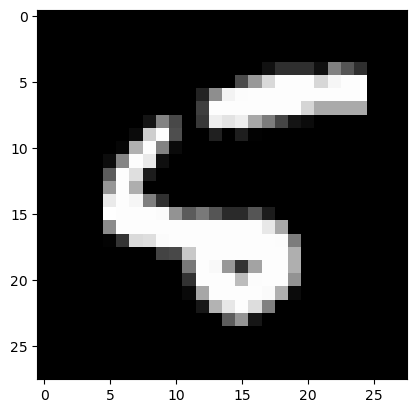

0.2660936336121504 0.3117304188855278
Label: 4 Result: 6


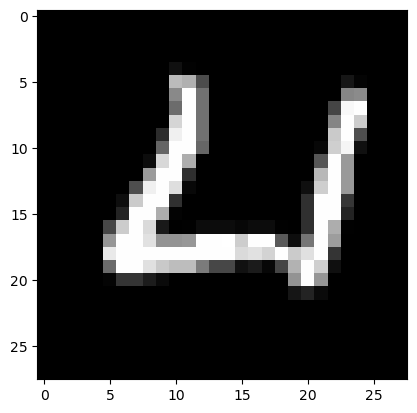

0.10226309720768077 0.5119427668068148
Label: 9 Result: 4


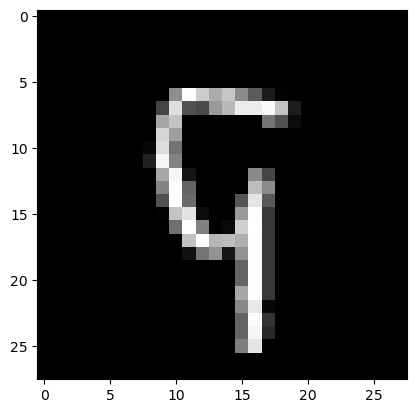

0.3270090143296637 0.39269526169863384
Label: 6 Result: 7


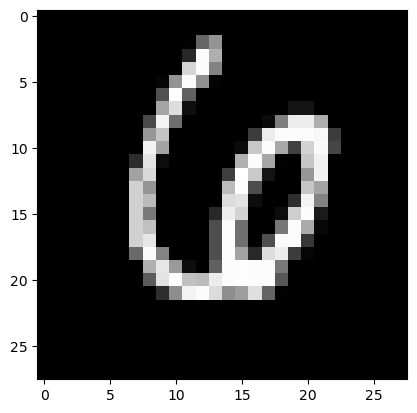

0.17022752869425245 0.2301053258091735
Label: 9 Result: 8


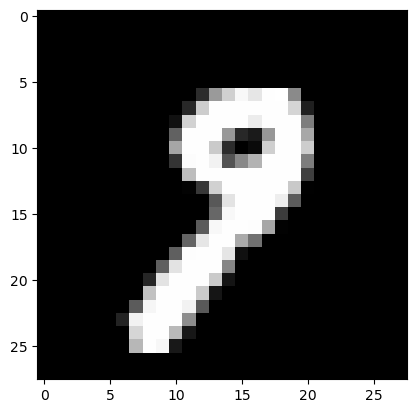

0.3612826620866756 0.4100768967685604
Label: 2 Result: 7


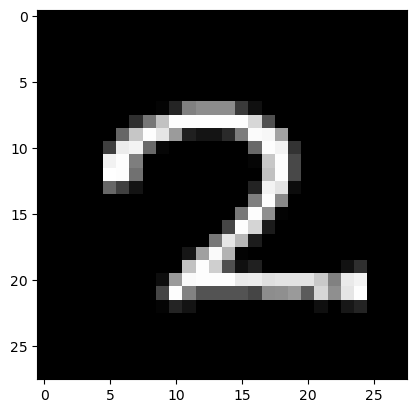

0.1931813745317607 0.47854036077181683
Label: 7 Result: 9


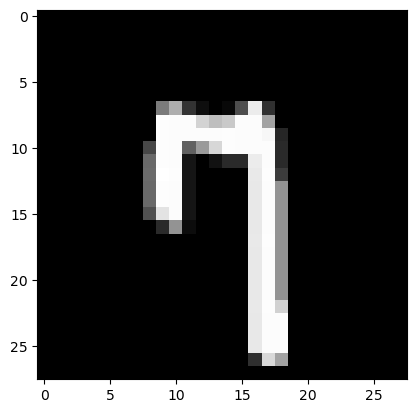

0.46587470431476335 0.5628675385871995
Label: 9 Result: 4


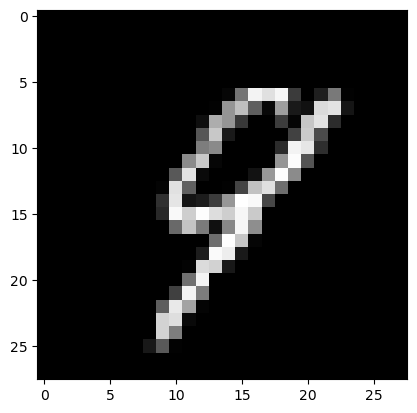

0.3209524680424392 0.4522566019848049


In [8]:
for i in range(100):
    predicted = nn.predict(X_test[i])
    if np.argmax(y_test[i]) != np.argmax(predicted):
        show_image(X_test, y_test, i, result=np.argmax(predicted))
        # print(predicted)
        print(predicted[0][np.argmax(y_test[i])], predicted[0][np.argmax(predicted)])